In [1]:
%load_ext autoreload
%autoreload 2
from analysis_lib import *

## Reanalysis of Runtimes with no Cache

In [21]:
df_single = pd.read_csv("./variable_k/runtimes/runtimes_single_bin.tsv", sep="\t", header=None)
df_k3 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k3.tsv", sep="\t", header=None)
df_k4 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k4.tsv", sep="\t", header=None)
df_k5 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k5.tsv", sep="\t", header=None)
df_k6 = pd.read_csv("./variable_k/runtimes_no_cache/runtimes_no_cache_k6.tsv", sep="\t", header=None)

In [22]:
dfs = [df_k3, df_k4, df_k5,df_k6]
for df in dfs:
    df.columns = ["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries"]

In [4]:
df_single.columns = ["tmp"]
df_single["Preprocessing"] = 0
df_single["Construction"] = 0
df_single["Traversal"] = 0
df_single["Scanning"] = df_single["tmp"]
df_single["Complexity"] = 0
df_single["Index Queries"] = 0
df_single = df_single.drop(columns=["tmp"], axis=1)

In [5]:
runtime_df = pd.DataFrame([df_single.mean(),df_k3.mean(),df_k4.mean(),df_k5.mean(),df_k6.mean()])

In [6]:
runtime_df["ksize"] = pd.Series(["No Index", 3,4,5,6])

Text(0, 0.5, 'Runtime (s)')

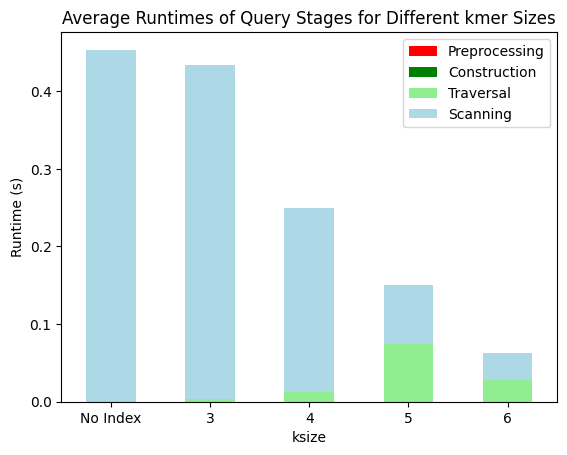

In [7]:
colors = ['red','green', 'lightgreen', 'lightblue']
plt = runtime_df.plot(kind='bar', stacked=True, x="ksize", y=["Preprocessing","Construction","Traversal","Scanning"], rot=0, color=colors, title="Average Runtimes of Query Stages for Different kmer Sizes")
plt.set_ylabel("Runtime (s)")

In [29]:
df_k3["ksize"] = 3
df_k4["ksize"] = 4
df_k5["ksize"] = 5
df_k6["ksize"] = 6

In [31]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["Preprocessing","Construction","Traversal","Scanning","Complexity","Index Queries","ksize"], how='outer'), dfs)

Text(0, 0.5, 'Traversal Time (s)')

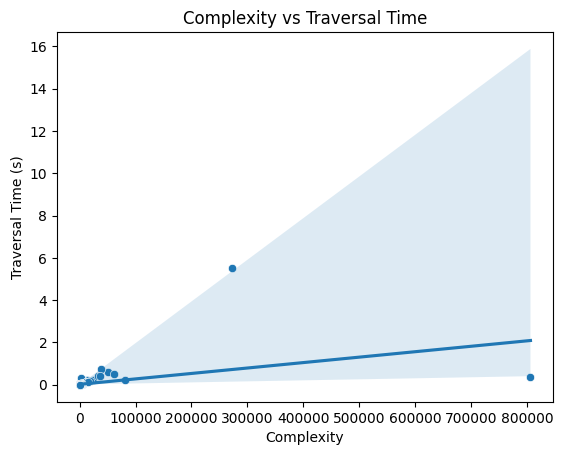

In [32]:
ax = sns.scatterplot(data=df_merged, x="Complexity", y="Traversal")
sns.regplot(data=df_merged, x="Complexity", y="Traversal", scatter=False, ax=ax)
ax.set_title("Complexity vs Traversal Time")
ax.set_ylabel("Traversal Time (s)")

Text(0, 0.5, 'Index Query Count')

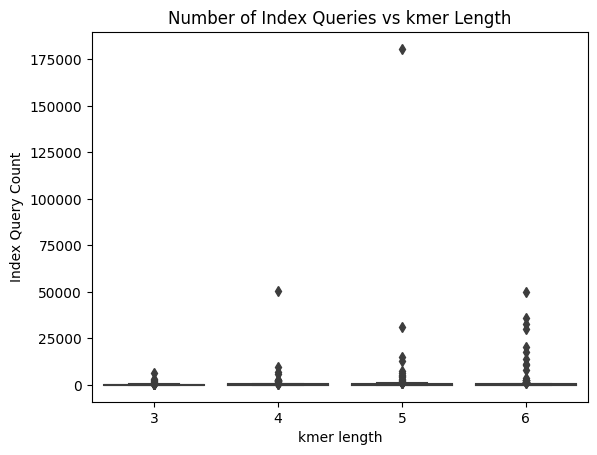

In [34]:
ax = sns.boxplot(data=df_merged, x="ksize", y="Index Queries")
ax.set_title("Number of Index Queries vs kmer Length")
ax.set_xlabel("kmer length")
ax.set_ylabel("Index Query Count")